In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [79]:
DATA_PATH = 'E:/桌面/辅助面/桌面2/翼支付金融选手下载的文件/'
train_label = pd.read_csv(DATA_PATH+'train_label.csv')
train_base = pd.read_csv(DATA_PATH+'train_base.csv')
test_base = pd.read_csv(DATA_PATH+'test_a_base.csv')

train_op = pd.read_csv(DATA_PATH+'train_op.csv')
train_trans = pd.read_csv(DATA_PATH+'train_trans.csv')
test_op = pd.read_csv(DATA_PATH+'test_a_op.csv')
test_trans = pd.read_csv(DATA_PATH+'test_a_trans.csv')

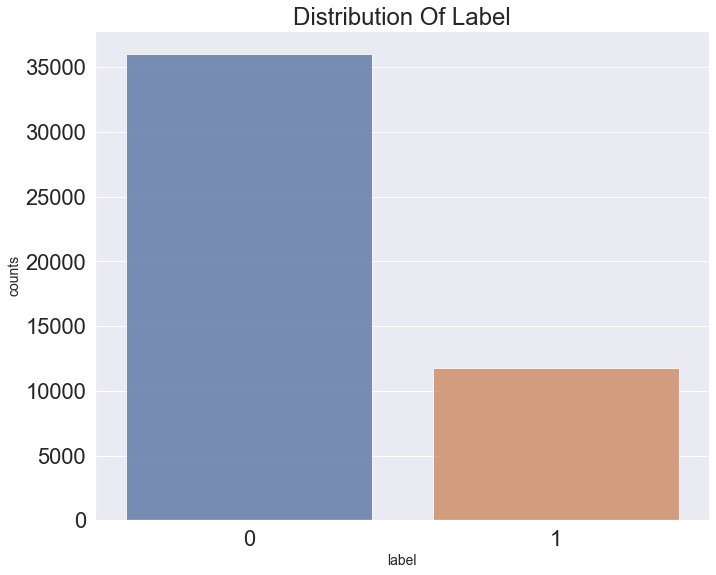

In [80]:
plt.figure(figsize=(11,9))
sns.countplot(train_label['label'],alpha=0.8)
plt.xlabel('label',fontsize=14)
plt.ylabel('counts',fontsize=14)
plt.title('Distribution Of Label')
plt.show()

In [81]:
train_label['label'].mean()

0.24653635260139803

In [82]:
## 基础信息数据

In [83]:
train_base = train_label.merge(train_base, on=['user'])

In [84]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47782 entries, 0 to 47781
Data columns (total 47 columns):
user                 47782 non-null object
label                47782 non-null int64
sex                  47568 non-null object
age                  47782 non-null int64
provider             47782 non-null object
level                47782 non-null object
verified             47782 non-null object
using_time           47782 non-null int64
regist_type          47782 non-null object
card_a_cnt           47782 non-null int64
card_b_cnt           47782 non-null int64
card_c_cnt           47782 non-null int64
agreement1           47782 non-null object
op1_cnt              47782 non-null int64
op2_cnt              47782 non-null int64
card_d_cnt           47782 non-null int64
agreement_total      47782 non-null int64
service1_cnt         47782 non-null int64
service1_amt         47782 non-null int64
service2_cnt         47782 non-null int64
agreement2           47782 non-null object
a

In [85]:
train_base.nunique()

user                 47782
label                    2
sex                      2
age                     48
provider                 3
level                    3
verified                 2
using_time              54
regist_type              8
card_a_cnt              18
card_b_cnt              11
card_c_cnt              15
agreement1               2
op1_cnt                 31
op2_cnt                 17
card_d_cnt               4
agreement_total         21
service1_cnt             7
service1_amt            58
service2_cnt             6
agreement2               2
agreement3               2
agreement4               2
acc_count               66
login_cnt_period1     2692
login_cnt_period2     1566
ip_cnt                 193
login_cnt_avg           76
login_days_cnt          91
province                31
city                   361
balance                 20
balance_avg             21
balance1                21
balance1_avg            21
balance2                20
balance2_avg             5
s

In [86]:
for i in test_base.columns:
    trn_ = set(train_base[i].unique())
    tst_ = set(test_base[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

user 47782 24315 0.0
sex 3 3 1.0
age 48 47 0.8723404255319149
provider 3 4 0.75
level 3 3 1.0
verified 2 2 1.0
using_time 54 54 1.0
regist_type 8 8 1.0
card_a_cnt 18 18 0.9444444444444444
card_b_cnt 11 12 0.9166666666666666
card_c_cnt 15 13 0.9230769230769231
agreement1 2 2 1.0
op1_cnt 31 25 0.96
op2_cnt 17 14 0.8571428571428571
card_d_cnt 4 4 1.0
agreement_total 21 20 1.0
service1_cnt 7 5 1.0
service1_amt 58 42 0.7619047619047619
service2_cnt 6 5 1.0
agreement2 2 2 1.0
agreement3 2 2 1.0
agreement4 2 2 1.0
acc_count 66 42 0.8333333333333334
login_cnt_period1 2692 1992 0.8177710843373494
login_cnt_period2 1566 1223 0.8479149632052331
ip_cnt 193 179 0.9162011173184358
login_cnt_avg 76 55 0.9090909090909091
login_days_cnt 91 91 1.0
province 31 32 0.96875
city 361 345 0.9971014492753624
balance 20 20 1.0
balance_avg 22 21 1.0
balance1 21 21 1.0
balance1_avg 22 21 1.0
balance2 20 20 1.0
balance2_avg 5 5 1.0
service3 2 2 1.0
service3_level 5 5 1.0
product1_amount 7 7 1.0
product2_amount 21 

In [87]:
### 单变量分析

In [88]:
#### 性别（Sex）

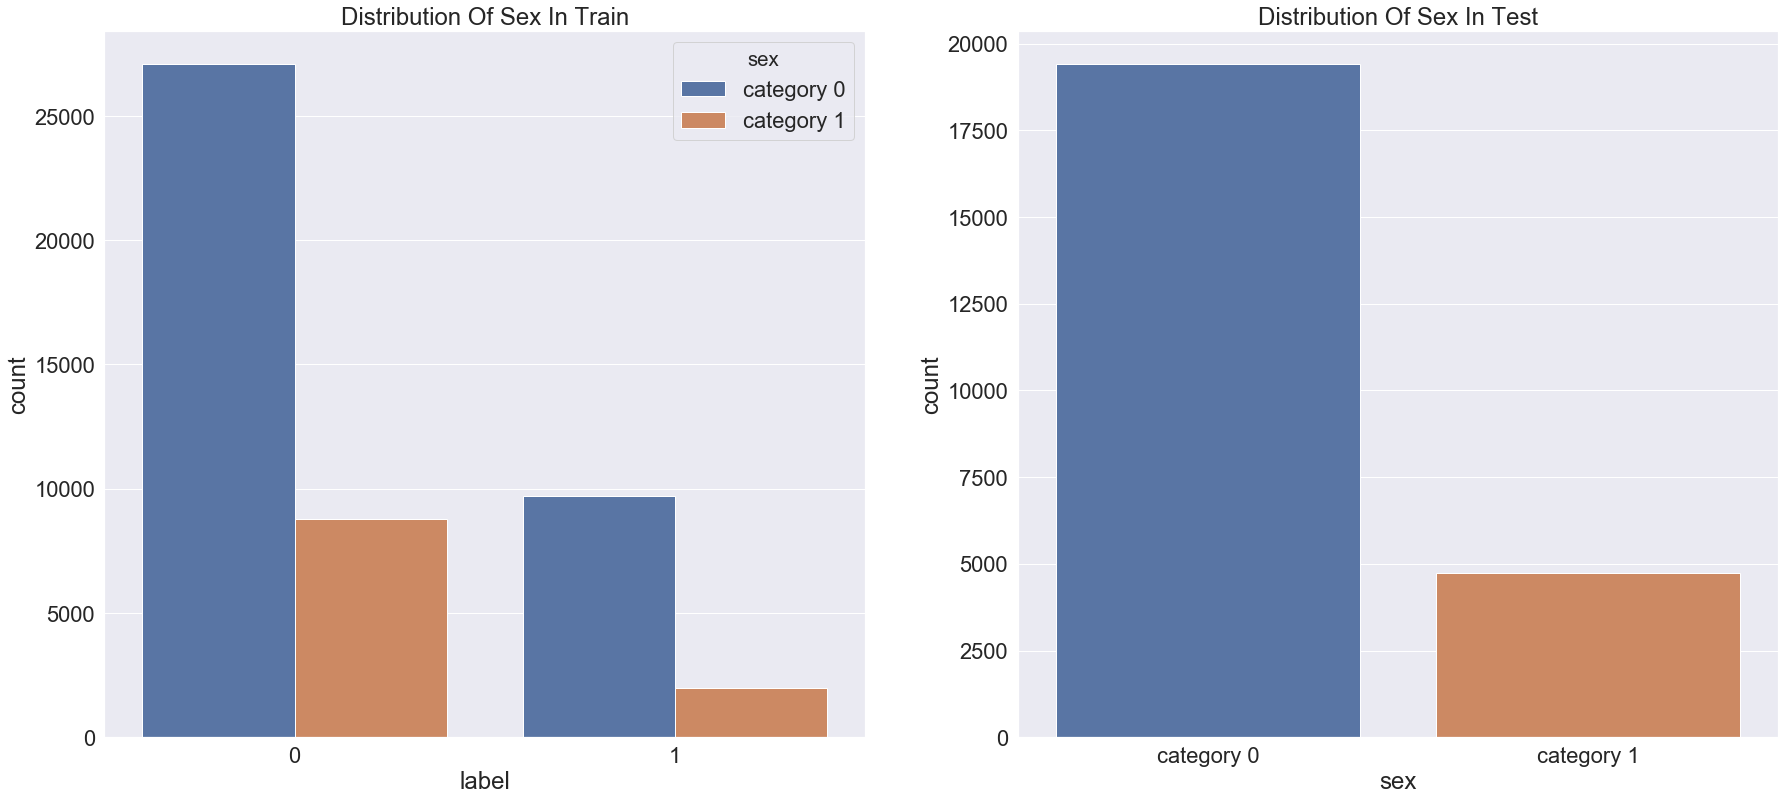

In [89]:
plt.figure(figsize=(30,13))
plt.subplot(1,2,1)
sns.countplot(x='label', hue='sex', data=train_base)
plt.title('Distribution Of Sex In Train')
plt.subplot(1,2,2)
sns.countplot(x='sex', data=test_base)
plt.title('Distribution Of Sex In Test')
plt.show()

In [90]:
#### 年龄（Age）

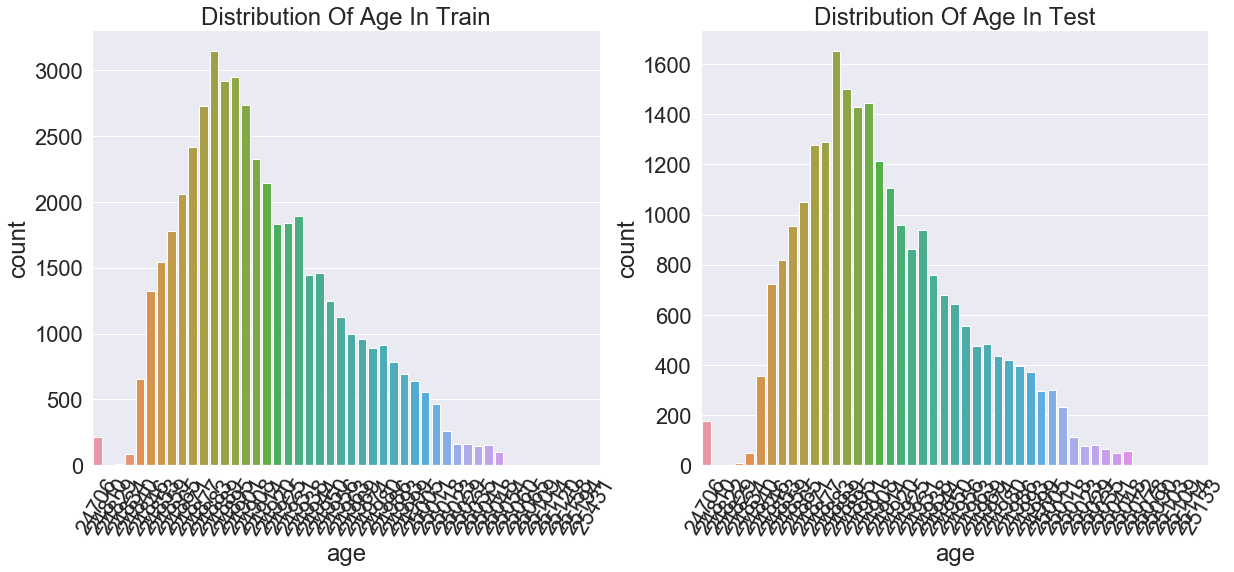

In [91]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='age', data=train_base)
plt.title('Distribution Of Age In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='age', data=test_base)
plt.title('Distribution Of Age In Test')
plt.xticks(rotation=60)
plt.show()

In [92]:
#### 运营商类型（provider）

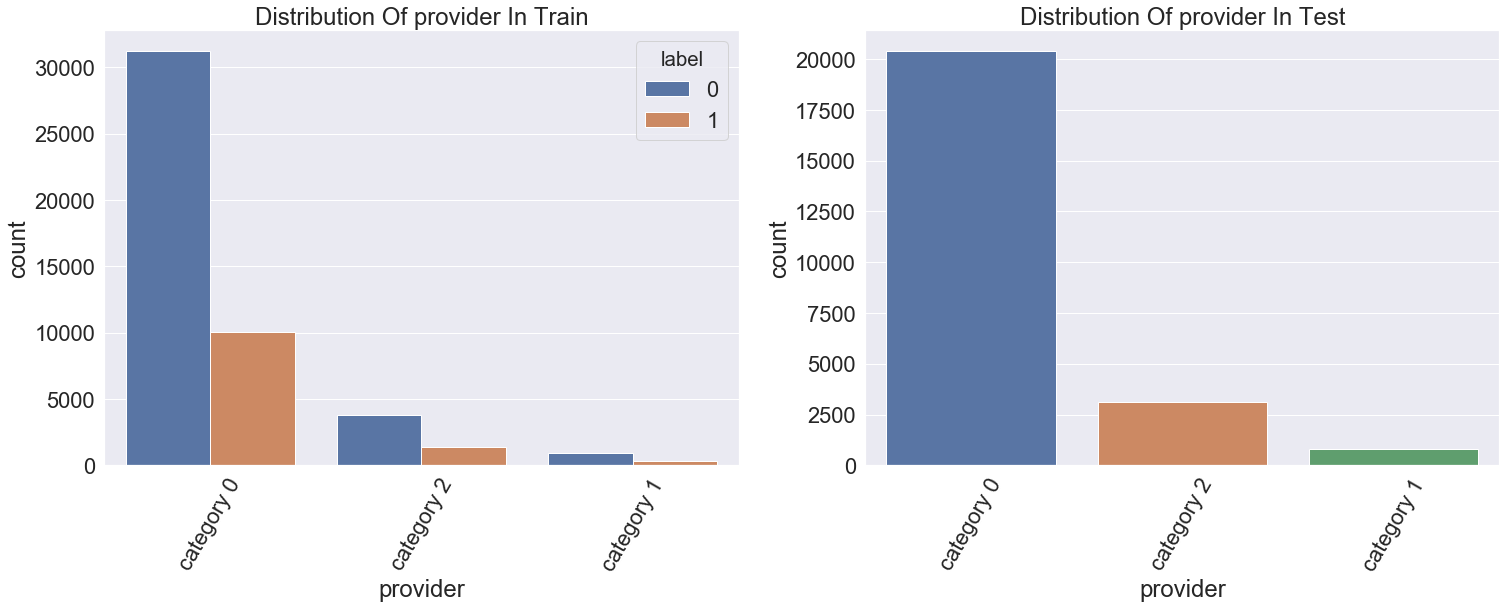

In [93]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='provider', hue='label', data=train_base)
plt.title('Distribution Of provider In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='provider', data=test_base)
plt.title('Distribution Of provider In Test')
plt.xticks(rotation=60)
plt.show()

In [94]:
#### 用户等级（level）

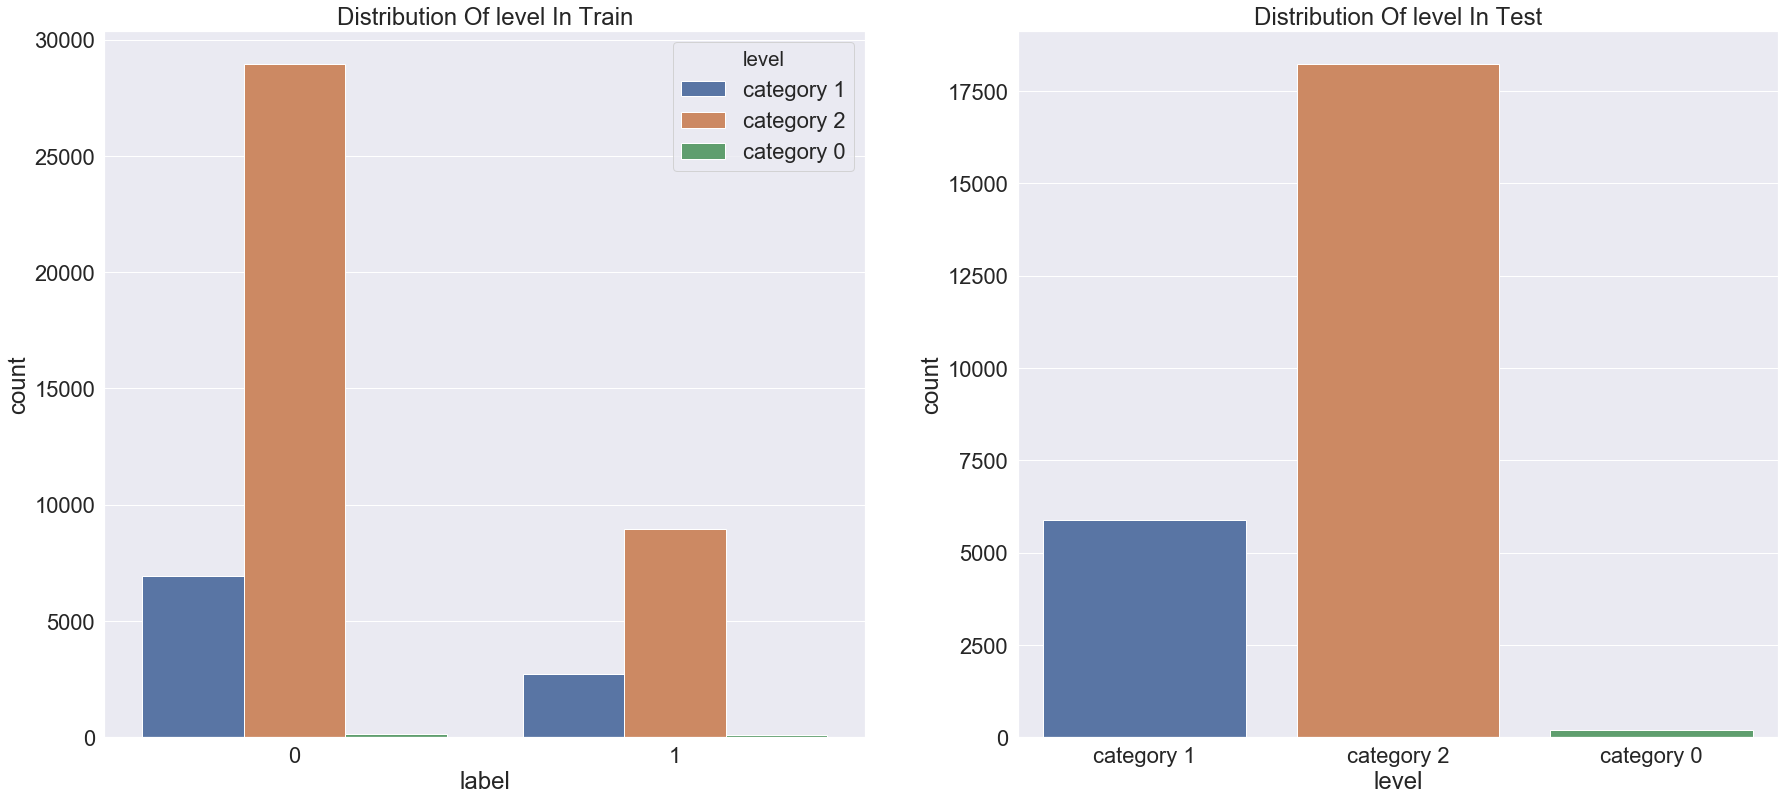

In [95]:
plt.figure(figsize=(30,13))
plt.subplot(1,2,1)
sns.countplot(x='label', hue='level', data=train_base)
plt.title('Distribution Of level In Train')
plt.subplot(1,2,2)
sns.countplot(x='level', data=test_base)
plt.title('Distribution Of level In Test')
plt.show()

In [96]:
####  是否实名（verified）

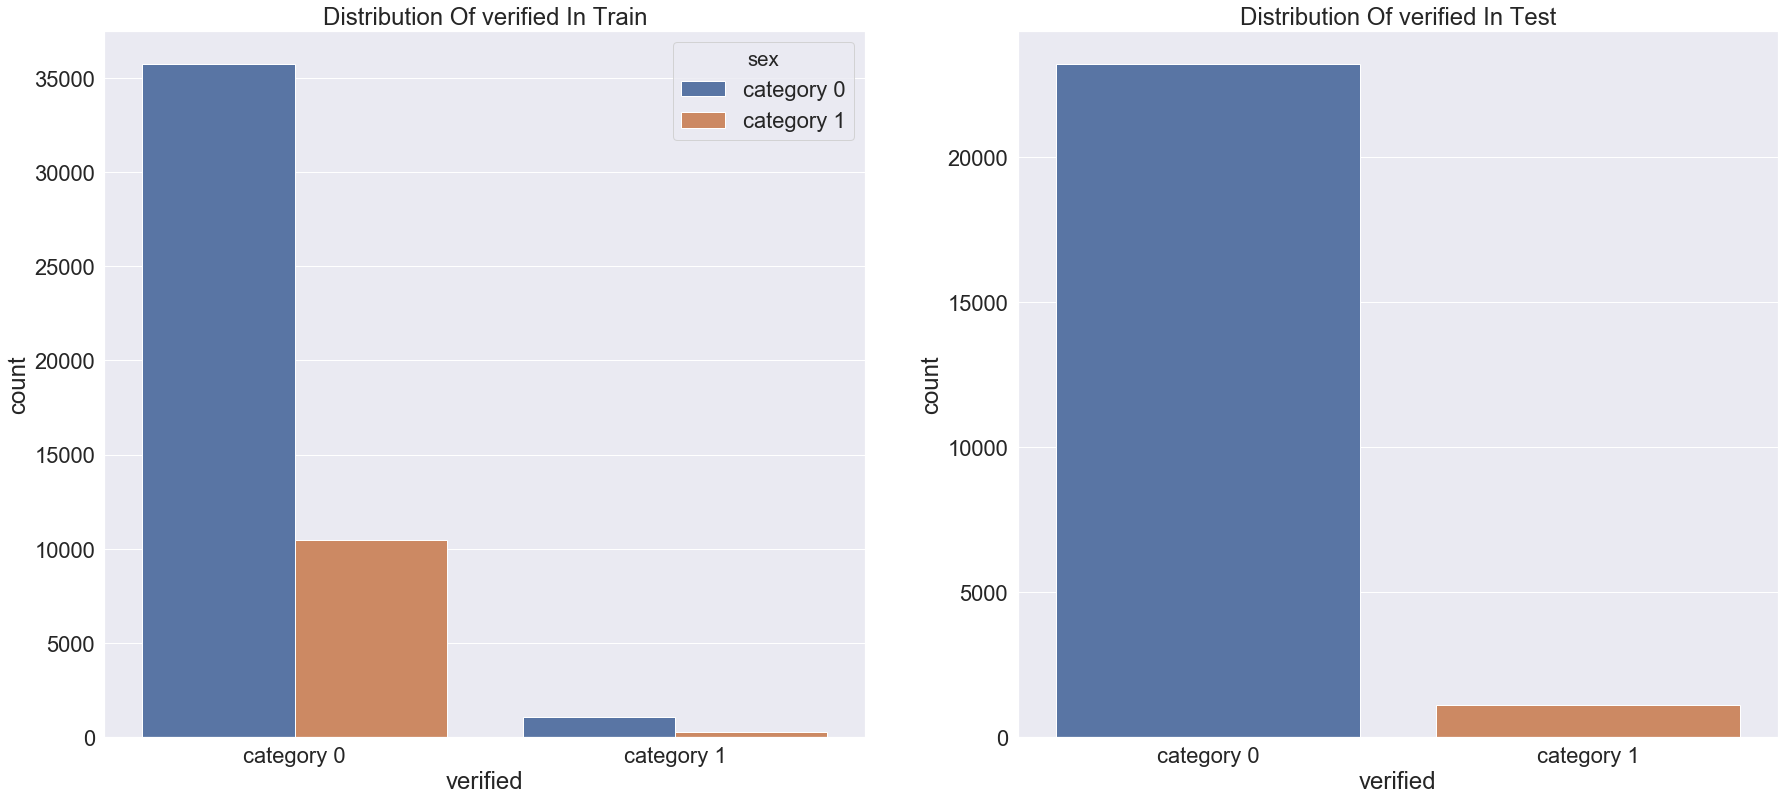

In [97]:
plt.figure(figsize=(30,13))
plt.subplot(1,2,1)
sns.countplot(x='verified', hue='sex', data=train_base)
plt.title('Distribution Of verified In Train')
plt.subplot(1,2,2)
sns.countplot(x='verified', data=test_base)
plt.title('Distribution Of verified In Test')
plt.show()

In [98]:
#### 使用时长（using_time）

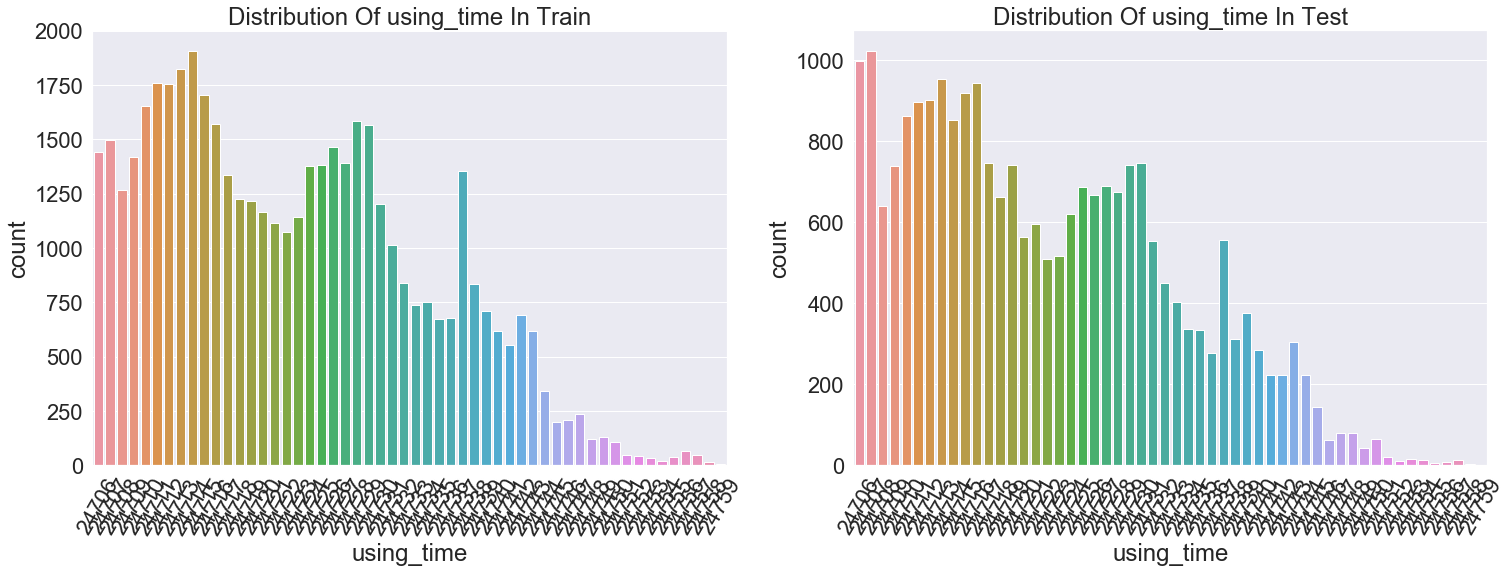

In [99]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='using_time', data=train_base)
plt.title('Distribution Of using_time In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='using_time', data=test_base)
plt.title('Distribution Of using_time In Test')
plt.xticks(rotation=60)
plt.show()

In [100]:
#### 注册类型（regist_type）

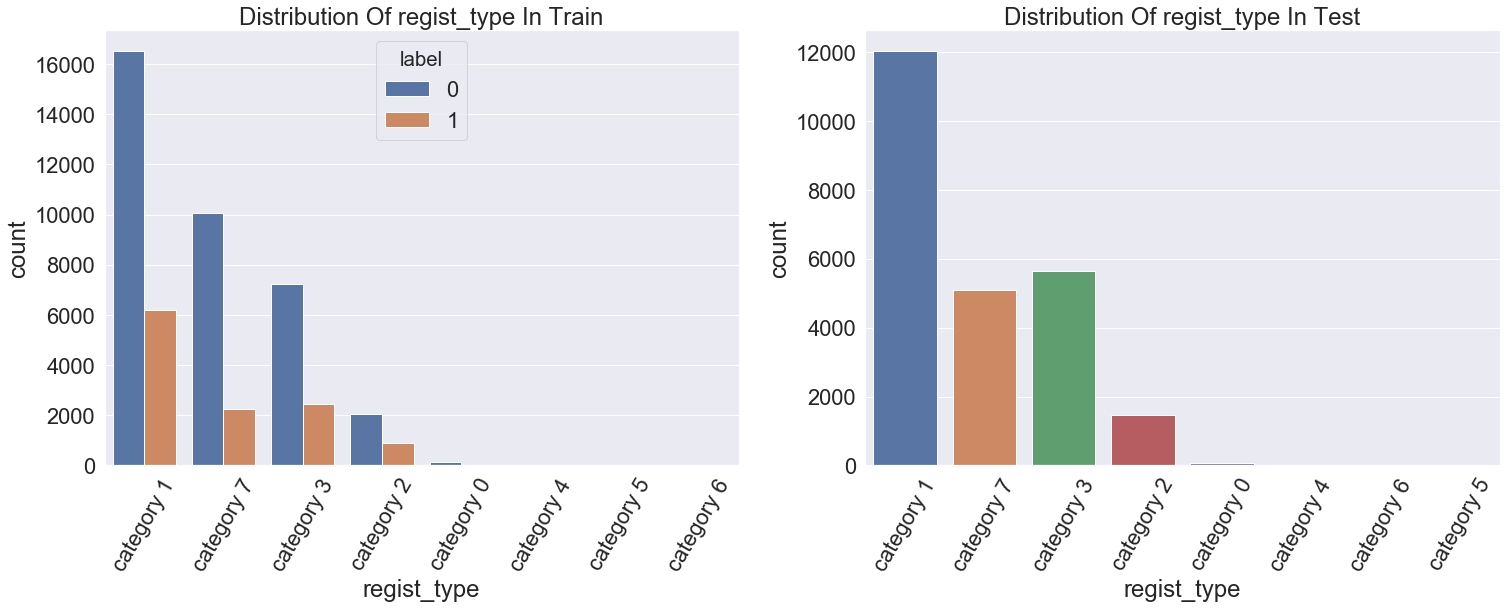

In [101]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='regist_type', hue='label', data=train_base)
plt.title('Distribution Of regist_type In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='regist_type', data=test_base)
plt.title('Distribution Of regist_type In Test')
plt.xticks(rotation=60)
plt.show()

In [102]:
#### a类型卡的数量（card_a_cnt）

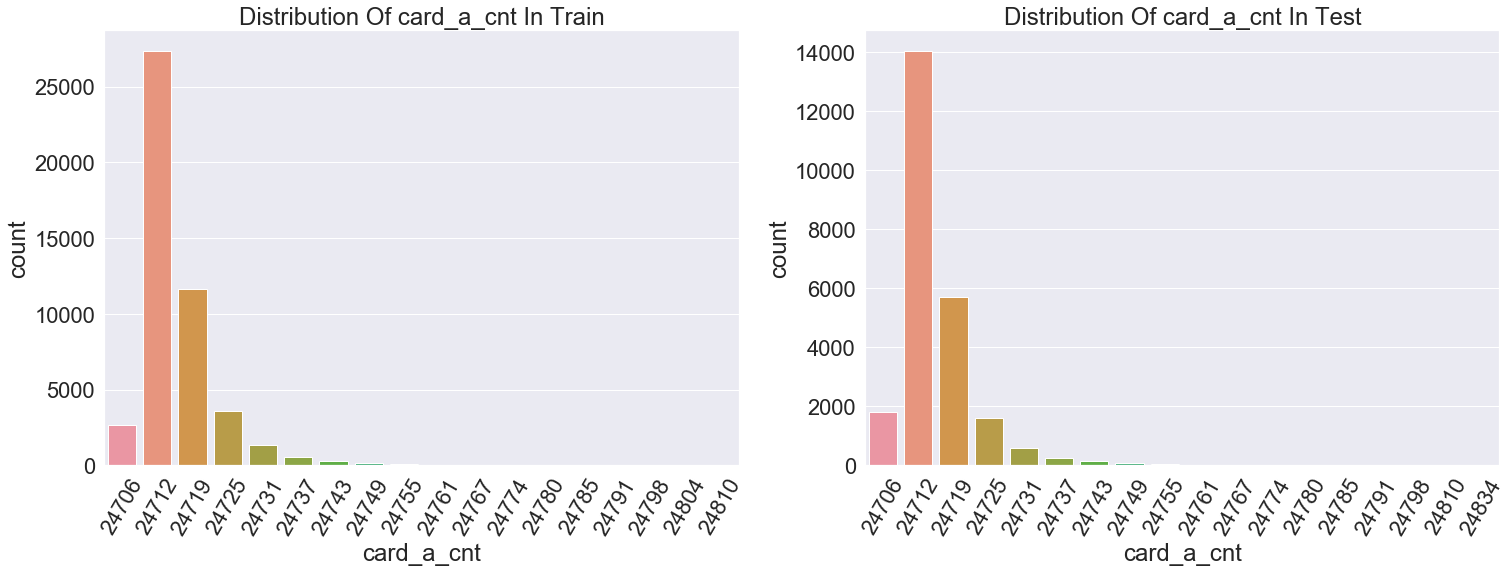

In [103]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='card_a_cnt', data=train_base)
plt.title('Distribution Of card_a_cnt In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='card_a_cnt', data=test_base)
plt.title('Distribution Of card_a_cnt In Test')
plt.xticks(rotation=60)
plt.show()

In [104]:
#### 城市（city）

Text(0.5, 1.0, 'Risk Ratio Of Different city')

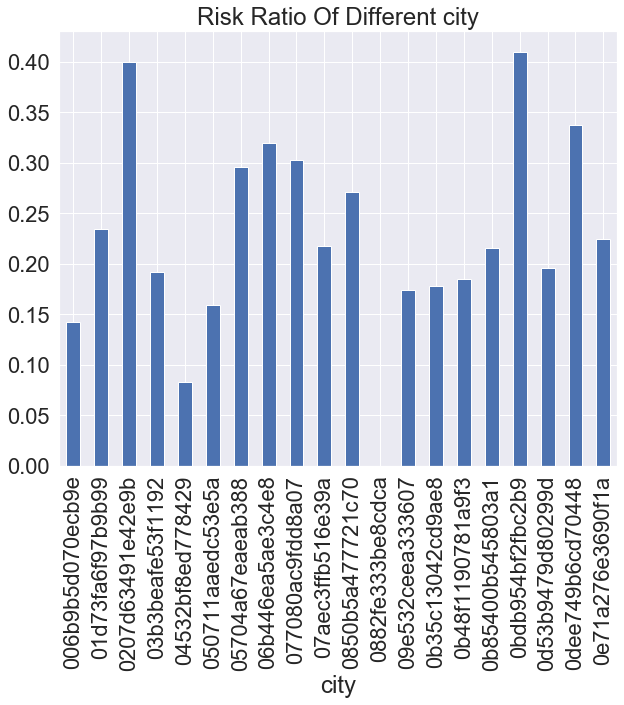

In [105]:
plt.figure(figsize=(10,8))
train_base.groupby(['city'])['label'].mean().head(20).plot.bar()
plt.title('Risk Ratio Of Different city')

In [106]:
##操作信息数据

In [107]:
train_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774988 entries, 0 to 2774987
Data columns (total 9 columns):
user         object
op_type      object
op_mode      object
op_device    object
ip           object
net_type     object
channel      object
ip_3         object
tm_diff      object
dtypes: object(9)
memory usage: 95.3+ MB


In [108]:
train_op.nunique()

user          41892
op_type         117
op_mode         124
op_device      1036
ip           195740
net_type          3
channel          53
ip_3          57072
tm_diff      878355
dtype: int64

In [109]:
for i in test_op.columns:
    trn_ = set(train_op[i].unique())
    tst_ = set(test_op[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

user 41892 20458 0.0
op_type 117 95 0.9894736842105263
op_mode 124 102 0.9901960784313726
op_device 1037 831 0.8471720818291215
ip 195741 80079 0.08941170594038388
net_type 4 4 1.0
channel 54 41 1.0
ip_3 57073 31901 0.5177580640105326
tm_diff 878355 568479 0.8141549643874268


In [110]:
#### 时间分布

In [111]:
train_op['days_diff'] = train_op['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
train_op['hour'] = train_op['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))
test_op['days_diff'] = test_op['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
test_op['hour'] = test_op['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))

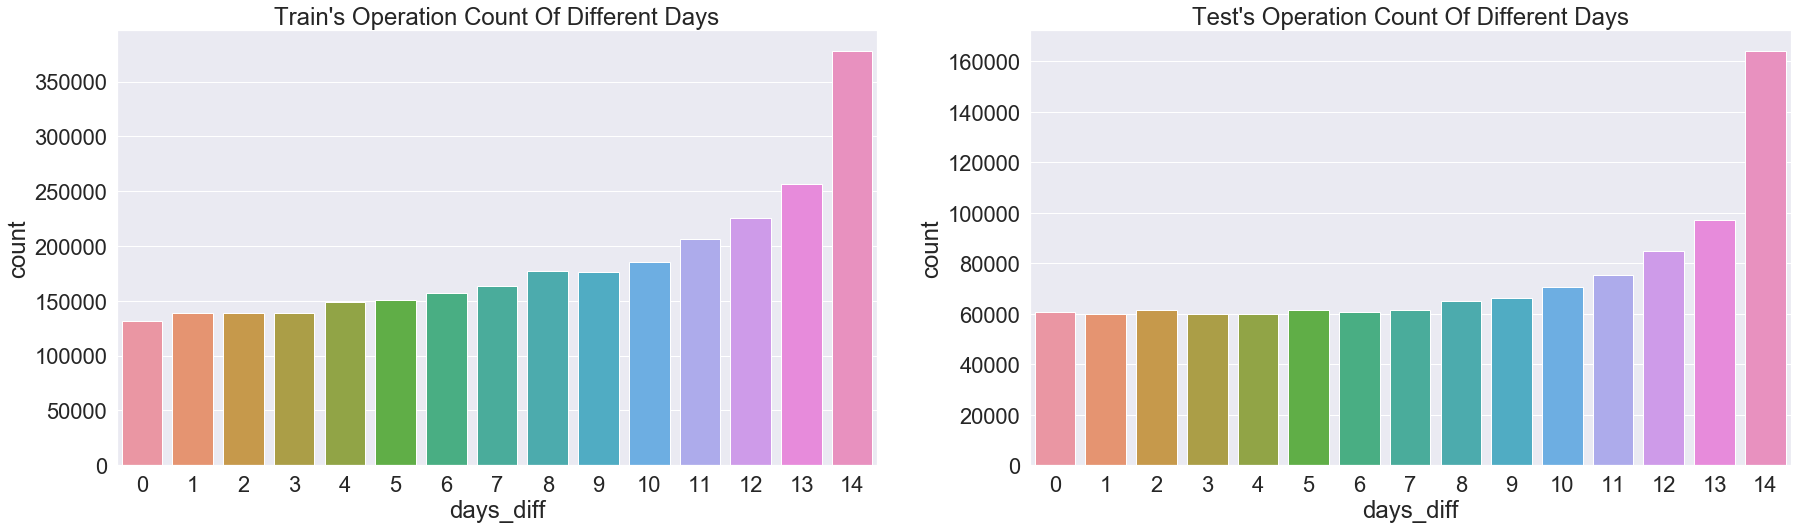

In [112]:
plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
sns.countplot(x='days_diff', data=train_op)
plt.title("Train's Operation Count Of Different Days")
plt.subplot(1,2,2)
sns.countplot(x='days_diff', data=test_op)
plt.title("Test's Operation Count Of Different Days")
plt.show()

In [113]:
### 单变量分析

In [114]:
#### 操作模式编码（op_type）

In [115]:
train_op[train_op['user'].isin(pos_user)]['op_type'].value_counts(normalize=True).head(20)

b26bc49195bd79cf    0.418232
af1d68e0408f5148    0.206090
22506db3af50317c    0.116605
35bc52dd67f3457c    0.063582
b88ed7c755c15ecb    0.040919
a6b741066e7e6409    0.033843
71b24e4fd9a658ee    0.016577
3089f3f91de53eee    0.013202
1f7b9f46b76ac2ba    0.010983
d2dbfbff9008d0ce    0.008742
e60611ee638b9f8b    0.007461
618c4e91ebfbdbd6    0.006803
c3e18a297049142a    0.003909
b05ceed7dc9293e4    0.003636
5e77bb97e6ec09fe    0.003610
a62df06c39c1c213    0.003423
d9e3bbe79c60f456    0.003266
6b217faacf252179    0.003208
9c815860e517a184    0.003140
16ef80f7c83b90e8    0.002449
Name: op_type, dtype: float64

In [116]:
train_op[train_op['user'].isin(neg_user)]['op_type'].value_counts(normalize=True).head(20)

b26bc49195bd79cf    0.385116
af1d68e0408f5148    0.253310
22506db3af50317c    0.158969
35bc52dd67f3457c    0.066981
b88ed7c755c15ecb    0.019187
a6b741066e7e6409    0.015642
71b24e4fd9a658ee    0.013893
3089f3f91de53eee    0.011719
1f7b9f46b76ac2ba    0.009862
5e77bb97e6ec09fe    0.009702
c3e18a297049142a    0.009014
d2dbfbff9008d0ce    0.005638
9ec71cc5ac535880    0.004751
aa3e58074640da64    0.004565
618c4e91ebfbdbd6    0.004497
e60611ee638b9f8b    0.003161
9c815860e517a184    0.001645
6b217faacf252179    0.001619
b05ceed7dc9293e4    0.001606
cec43196cceb9f64    0.001519
Name: op_type, dtype: float64

In [117]:
#### 操作类型编码（op_mode）

In [118]:
train_op[train_op['user'].isin(pos_user)]['op_mode'].value_counts(normalize=True).head(20)

87ee0bdf333a54da    0.406442
af1d68e0408f5148    0.206090
22506db3af50317c    0.116605
9698d2ce0bae124b    0.069581
b88ed7c755c15ecb    0.040919
a6b741066e7e6409    0.033843
6b0823f22acf82cf    0.014500
3089f3f91de53eee    0.013202
1f7b9f46b76ac2ba    0.010983
d2dbfbff9008d0ce    0.008742
e60611ee638b9f8b    0.007461
618c4e91ebfbdbd6    0.006803
9ea0be9ee3a3bbeb    0.004810
c3e18a297049142a    0.003909
b05ceed7dc9293e4    0.003636
5e77bb97e6ec09fe    0.003610
a62df06c39c1c213    0.003423
d9e3bbe79c60f456    0.003266
fbac24da0fe5fd84    0.003231
6b217faacf252179    0.003208
Name: op_mode, dtype: float64

In [119]:
train_op[train_op['user'].isin(neg_user)]['op_mode'].value_counts(normalize=True).head(20)

87ee0bdf333a54da    0.371996
af1d68e0408f5148    0.253310
22506db3af50317c    0.158969
9698d2ce0bae124b    0.070531
b88ed7c755c15ecb    0.019187
a6b741066e7e6409    0.015642
6b0823f22acf82cf    0.012380
3089f3f91de53eee    0.011719
1f7b9f46b76ac2ba    0.009862
5e77bb97e6ec09fe    0.009702
9ea0be9ee3a3bbeb    0.009332
c3e18a297049142a    0.009014
d2dbfbff9008d0ce    0.005638
9ec71cc5ac535880    0.004751
aa3e58074640da64    0.004565
618c4e91ebfbdbd6    0.004497
e60611ee638b9f8b    0.003161
fbac24da0fe5fd84    0.001905
9c815860e517a184    0.001645
6b217faacf252179    0.001619
Name: op_mode, dtype: float64

In [120]:
## 交易信息数据

In [121]:
train_trans = train_trans.merge(train_label, on=['user'], how='left')

In [122]:
def transform_time(x):
    day = int(x.split(' ')[0])
    hour = int(x.split(' ')[2].split('.')[0].split(':')[0])
    minute = int(x.split(' ')[2].split('.')[0].split(':')[1])
    second = int(x.split(' ')[2].split('.')[0].split(':')[2])
    return 86400*day+3600*hour+60*minute+second

In [123]:
train_trans['days_diff'] = train_trans['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
train_trans['hour'] = train_trans['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))

test_trans['days_diff'] = test_trans['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
test_trans['hour'] = test_trans['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))

In [124]:
pos_user = list(train_label[train_label['label']==1]['user'].unique())
neg_user = list(train_label[train_label['label']==0]['user'].unique())

In [125]:
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591266 entries, 0 to 591265
Data columns (total 13 columns):
user          591266 non-null object
platform      591266 non-null object
tunnel_in     435367 non-null object
tunnel_out    590750 non-null object
amount        591266 non-null int64
type1         591266 non-null object
ip            246341 non-null object
type2         429468 non-null object
ip_3          246341 non-null object
tm_diff       591266 non-null object
label         591266 non-null int64
days_diff     591266 non-null int64
hour          591266 non-null int64
dtypes: int64(4), object(9)
memory usage: 42.9+ MB


In [126]:
train_trans.nunique()

user           41560
platform           6
tunnel_in          5
tunnel_out         4
amount         27589
type1             20
ip             87808
type2             12
ip_3           31436
tm_diff       405827
label              2
days_diff         31
hour              24
dtype: int64

In [127]:
for i in test_trans.columns:
    trn_ = set(train_trans[i].unique())
    tst_ = set(test_trans[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

user 41560 18813 0.0
platform 6 6 1.0
tunnel_in 6 6 1.0
tunnel_out 5 5 1.0
amount 27589 15511 0.5610212107536587
type1 20 17 1.0
ip 87809 26324 0.04626956389606443
type2 13 15 0.8666666666666667
ip_3 31437 14776 0.4917433676231727
tm_diff 405827 119958 0.22245285850047516
days_diff 31 31 1.0
hour 24 24 1.0


In [128]:
### 时间分布
####探究不同天数对交易频次的影响，以及训练集与测试集的区别

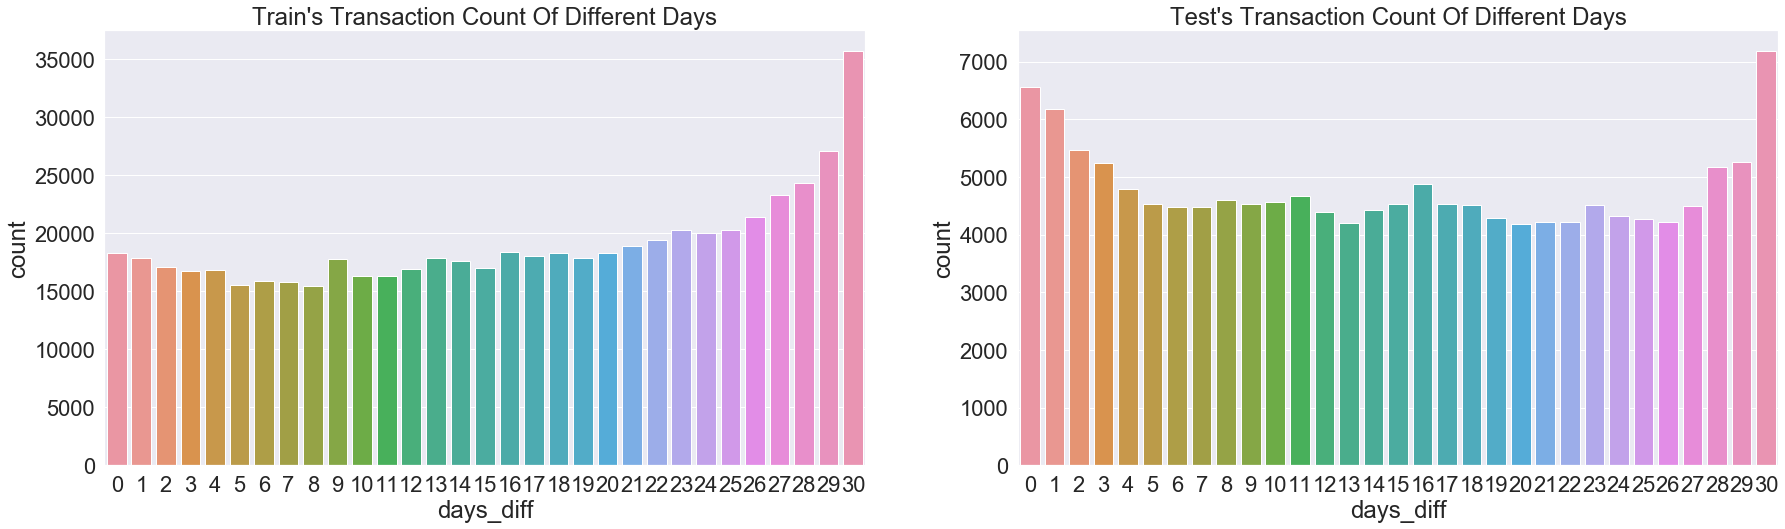

In [129]:
plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
sns.countplot(x='days_diff', data=train_trans)
plt.title("Train's Transaction Count Of Different Days")
plt.subplot(1,2,2)
sns.countplot(x='days_diff', data=test_trans)
plt.title("Test's Transaction Count Of Different Days")
plt.show()

In [130]:
### 单变量分析

In [131]:
#### 交易金额（amount）

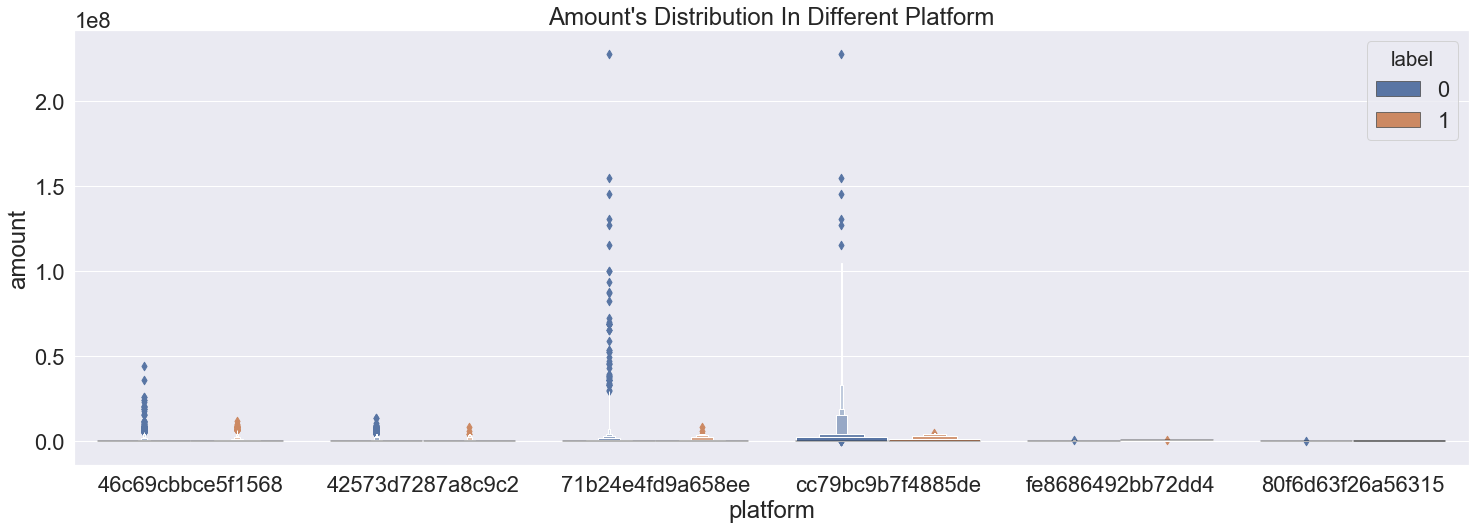

In [132]:
plt.figure(figsize=(25, 8))
sns.boxenplot(x='platform', y='amount', hue='label', data=train_trans)
plt.title("Amount's Distribution In Different Platform")
plt.show()